# 2.3 Unsupervised Machine Learning
## This script includes the following points:
#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for modeling
#### 4. Data Split
#### 5. Random Forest Model
#### 6. Uncovering Feature Importances

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
#Create a path to where your data is stored.
path = r"C:\Users\Poory\OneDrive\Desktop\project\ClimateWins"

In [3]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Unsupervised', 'climate_clean.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Unsupervised', 'answers_clean.csv'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [6]:
answers.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

## 2. Reshaping for modelingm

In [7]:
X = climate

In [8]:
y = answers

In [9]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(22950, 135)

In [11]:
y.shape

(22950, 15)

## 4. Data Split 

In [12]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 135) (17212, 15)
(5738, 135) (5738, 15)


## 5. Random Forest Model

In [14]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7058208434994772


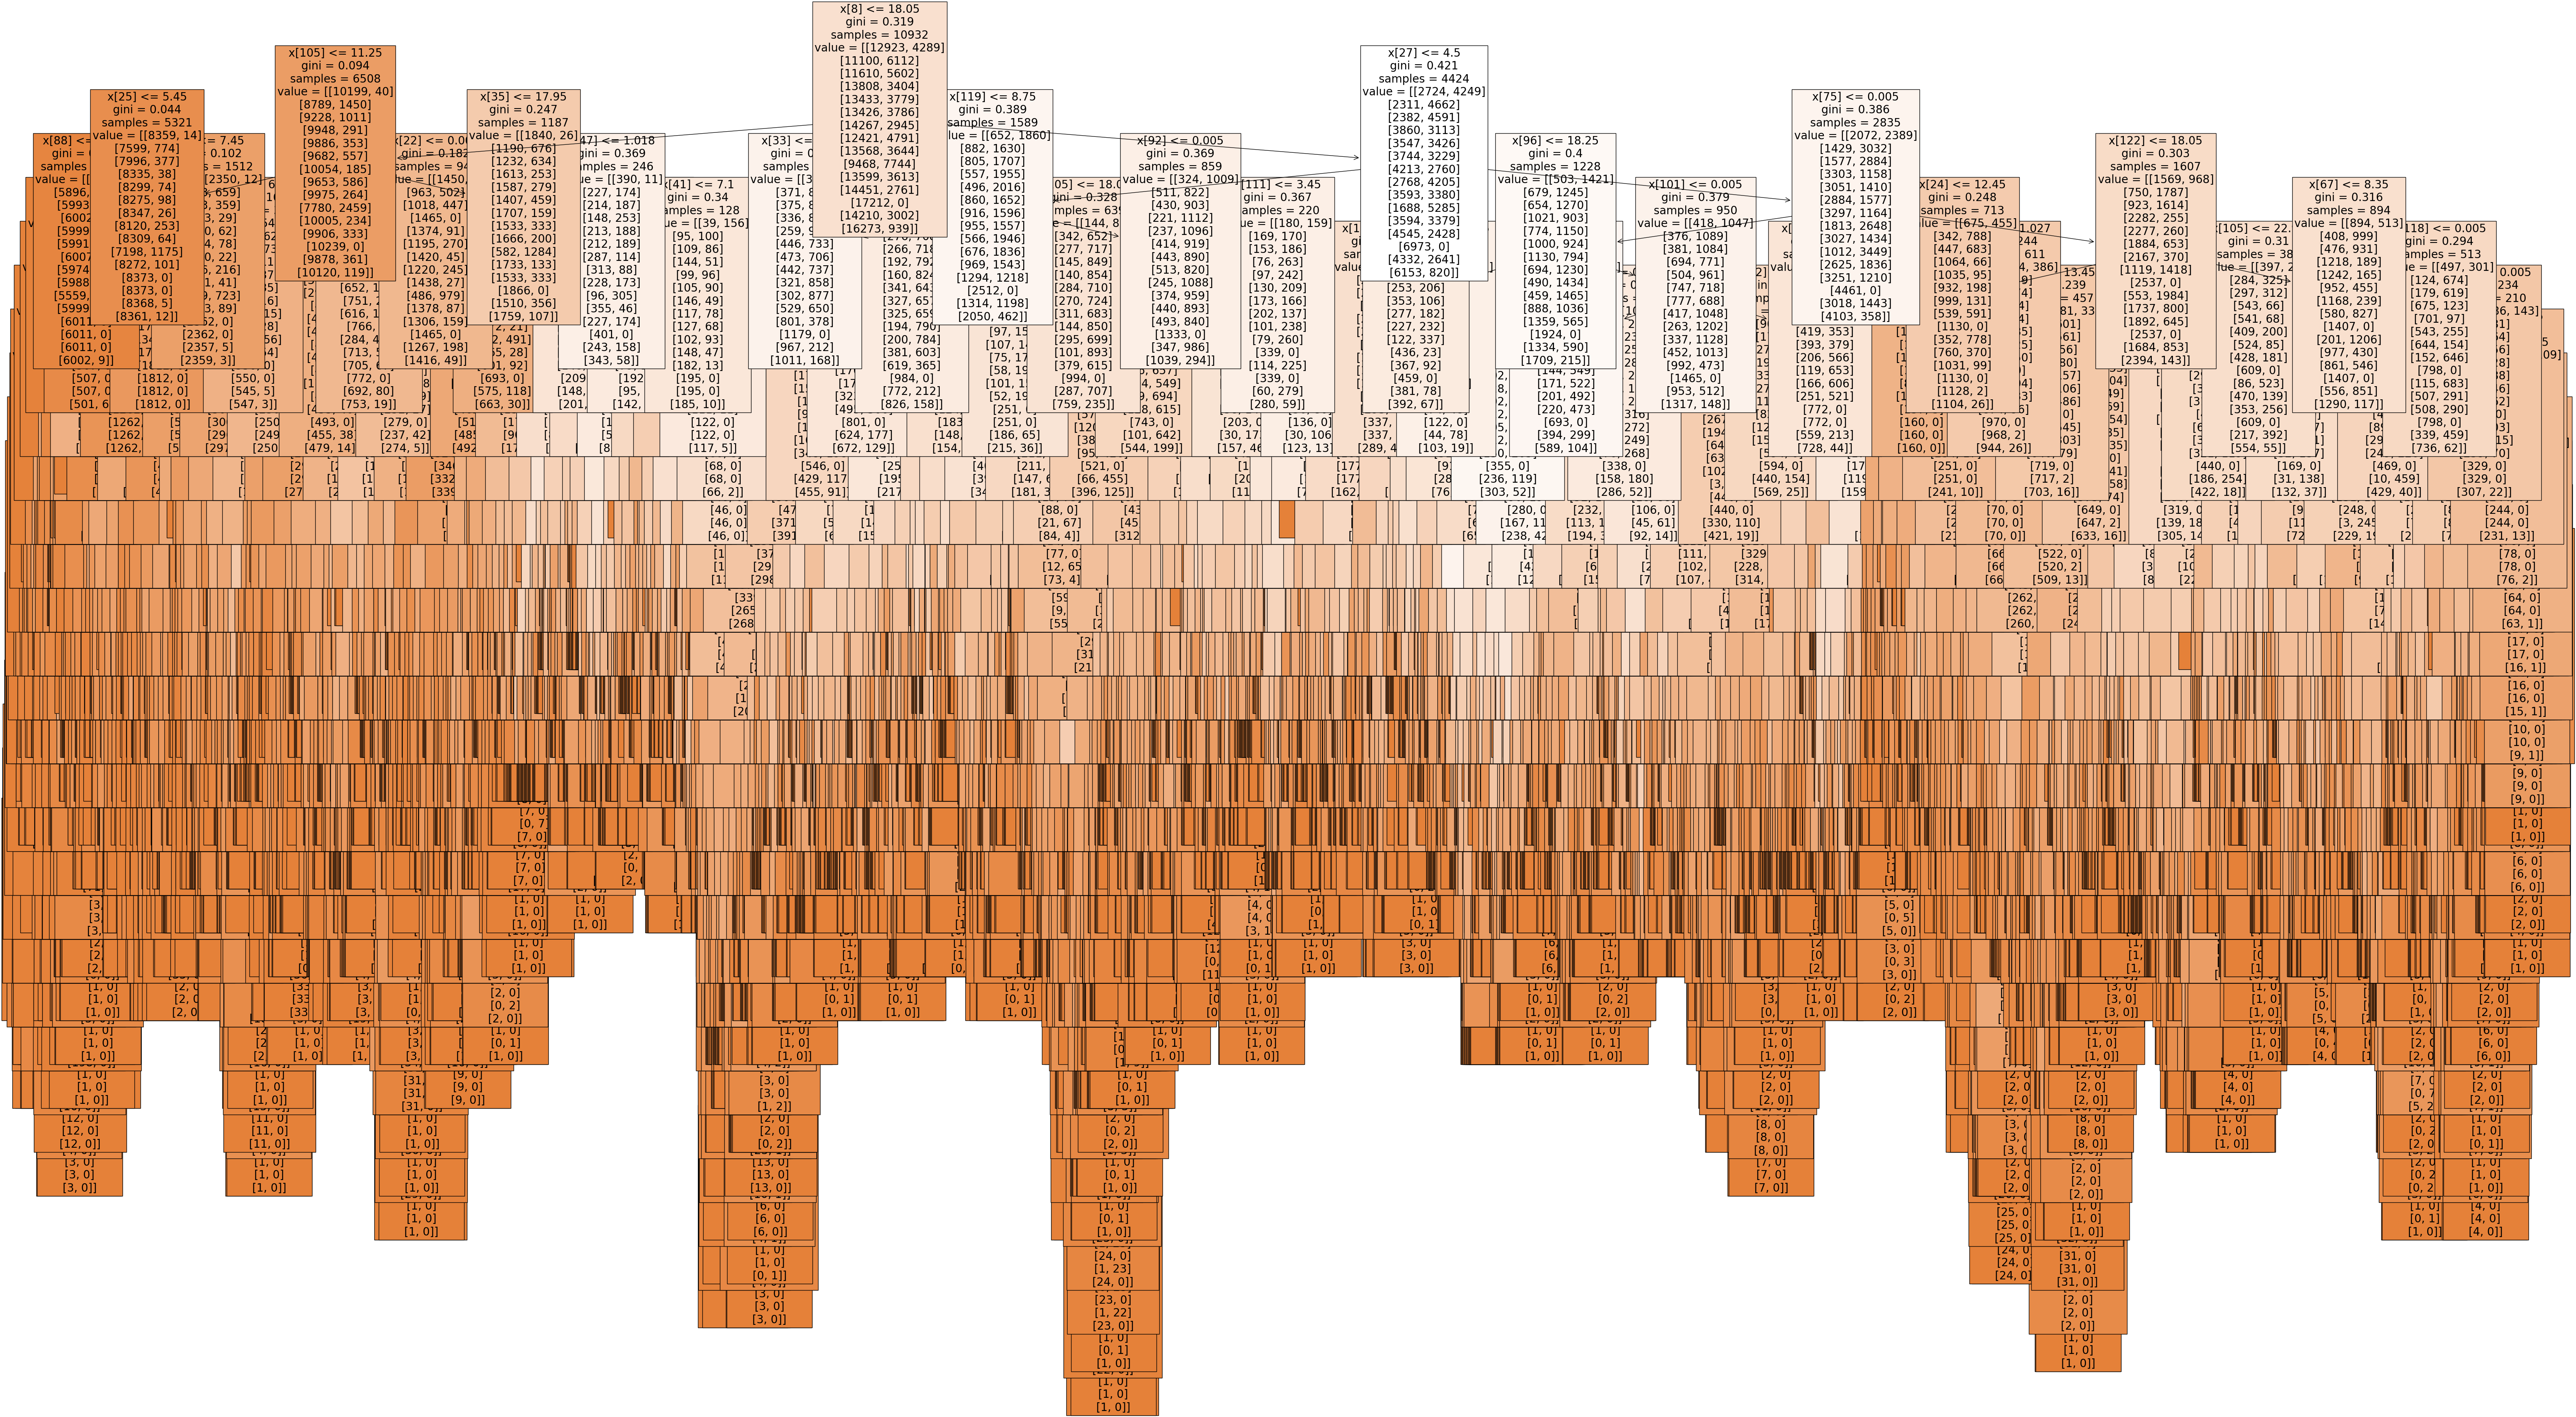

In [16]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

## 6. Uncovering Feature Importances

In [17]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.0035595 , 0.00278415, 0.00198913, 0.0060355 , 0.01904325,
       0.00576188, 0.02047523, 0.00501651, 0.02819046, 0.00315791,
       0.00314105, 0.0030125 , 0.00296005, 0.02132482, 0.00377924,
       0.00514158, 0.00303573, 0.01250363, 0.00146449, 0.00176912,
       0.00178817, 0.00282566, 0.01903122, 0.00320015, 0.01149442,
       0.00294107, 0.01465243, 0.00428659, 0.0023797 , 0.00475107,
       0.00548729, 0.01879082, 0.00450299, 0.01210787, 0.00215032,
       0.03052008, 0.00502327, 0.00249023, 0.00263304, 0.00506175,
       0.01781755, 0.00633429, 0.02471569, 0.00420976, 0.03646085,
       0.00192528, 0.00306369, 0.0034934 , 0.00370805, 0.01135397,
       0.00346111, 0.01512742, 0.00249794, 0.01830981, 0.00281506,
       0.0030417 , 0.00335976, 0.01434241, 0.00391973, 0.01109425,
       0.00233101, 0.00887556, 0.00280702, 0.00292197, 0.00277918,
       0.00361608, 0.0195684 , 0.0040281 , 0.01054956, 0.00234063,
       0.02925121, 0.00650912, 0.00259438, 0.0037153 , 0.00374

In [18]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.0035595 , 0.00278415, 0.00198913, 0.0060355 , 0.01904325,
         0.00576188, 0.02047523, 0.00501651, 0.02819046],
        [0.00315791, 0.00314105, 0.0030125 , 0.00296005, 0.02132482,
         0.00377924, 0.00514158, 0.00303573, 0.01250363],
        [0.00146449, 0.00176912, 0.00178817, 0.00282566, 0.01903122,
         0.00320015, 0.01149442, 0.00294107, 0.01465243],
        [0.00428659, 0.0023797 , 0.00475107, 0.00548729, 0.01879082,
         0.00450299, 0.01210787, 0.00215032, 0.03052008],
        [0.00502327, 0.00249023, 0.00263304, 0.00506175, 0.01781755,
         0.00633429, 0.02471569, 0.00420976, 0.03646085],
        [0.00192528, 0.00306369, 0.0034934 , 0.00370805, 0.01135397,
         0.00346111, 0.01512742, 0.00249794, 0.01830981],
        [0.00281506, 0.0030417 , 0.00335976, 0.01434241, 0.00391973,
         0.01109425, 0.00233101, 0.00887556, 0.00280702],
        [0.00292197, 0.00277918, 0.00361608, 0.0195684 , 0.0040281 ,
         0.01054956, 0.00234063, 0.0292512

In [19]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09285562, 0.05805653, 0.05916673, 0.08497674, 0.10474642,
       0.06294067, 0.05258652, 0.08156426, 0.09286615, 0.06823423,
       0.07678735, 0.06366917, 0.02396034, 0.05210309, 0.02548619])

In [20]:
# Extract stations list

stations = [col.split('_')[0] for col in climate.columns if '_' in col]

In [21]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [22]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BASEL         0.104746
SONNBLICK     0.092866
BELGRADE      0.092856
STOCKHOLM     0.084977
KASSEL        0.081564
VALENTIA      0.076787
LJUBLJANA     0.068234
BUDAPEST      0.063669
MADRID        0.062941
DUSSELDORF    0.059167
OSLO          0.058057
HEATHROW      0.052587
MUNCHENB      0.052103
DEBILT        0.025486
MAASTRICHT    0.023960
dtype: float64

In [23]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BELGRADE', 'OSLO', 'DUSSELDORF', 'STOCKHOLM', 'BASEL', 'MADRID', 'HEATHROW', 'KASSEL', 'SONNBLICK', 'LJUBLJANA', 'VALENTIA', 'BUDAPEST', 'MAASTRICHT', 'MUNCHENB', 'DEBILT']


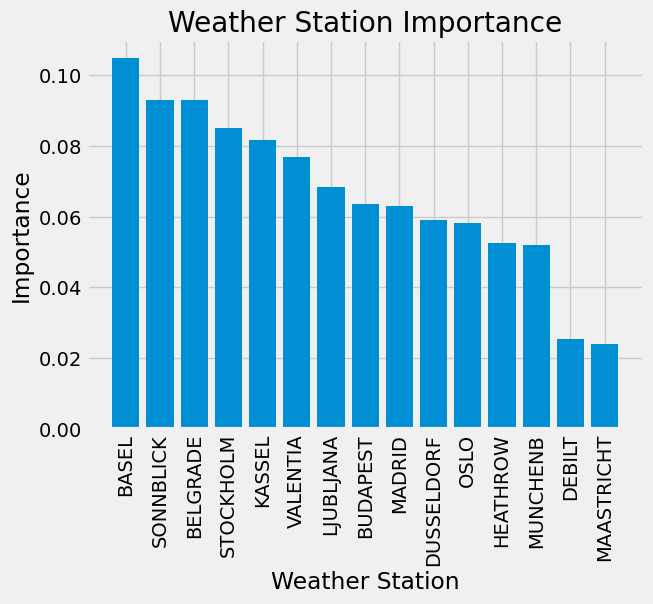

In [26]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance')
plt.show()

## 7. Random Forest for Basel data (all years)

In [29]:
# Create a list of the columns containing "Basel" in their names


basel_list = list(x for x in climate.columns if x.find('BASEL') >=0)

# Create a dataframe with those columns

df_basel = climate[basel_list]
df_basel

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0                  6.5             0.8            10.9  
1                  6.1             3.3            10.1  
2                  8.5             5.1             9.9  
3                  6.3             3.8            10.6  
4                  3.0            -0.7             6.0  
...                ...             ...             ...  
22945             15.9            11.4            21.4  
22946             16.7            14.3            21.9  
22947             16.7            13.1            22.4  
22948             15.4            11.6            21.1  
22949             13.5             9.9            19.2  

[22950 rows x 9 columns]

In [30]:
# Reduce answers dataset to Basel's answers only

answers_basel = answers['BASEL_pleasant_weather']
answers_basel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [31]:
df_basel.shape # observations dataset has t

(22950, 9)

In [32]:
answers_basel.shape # predictions dataset has the correct shape

(22950,)

In [33]:
# Reshaping for modeling

X = df_basel
y = answers_basel

In [35]:
# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

In [36]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [38]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


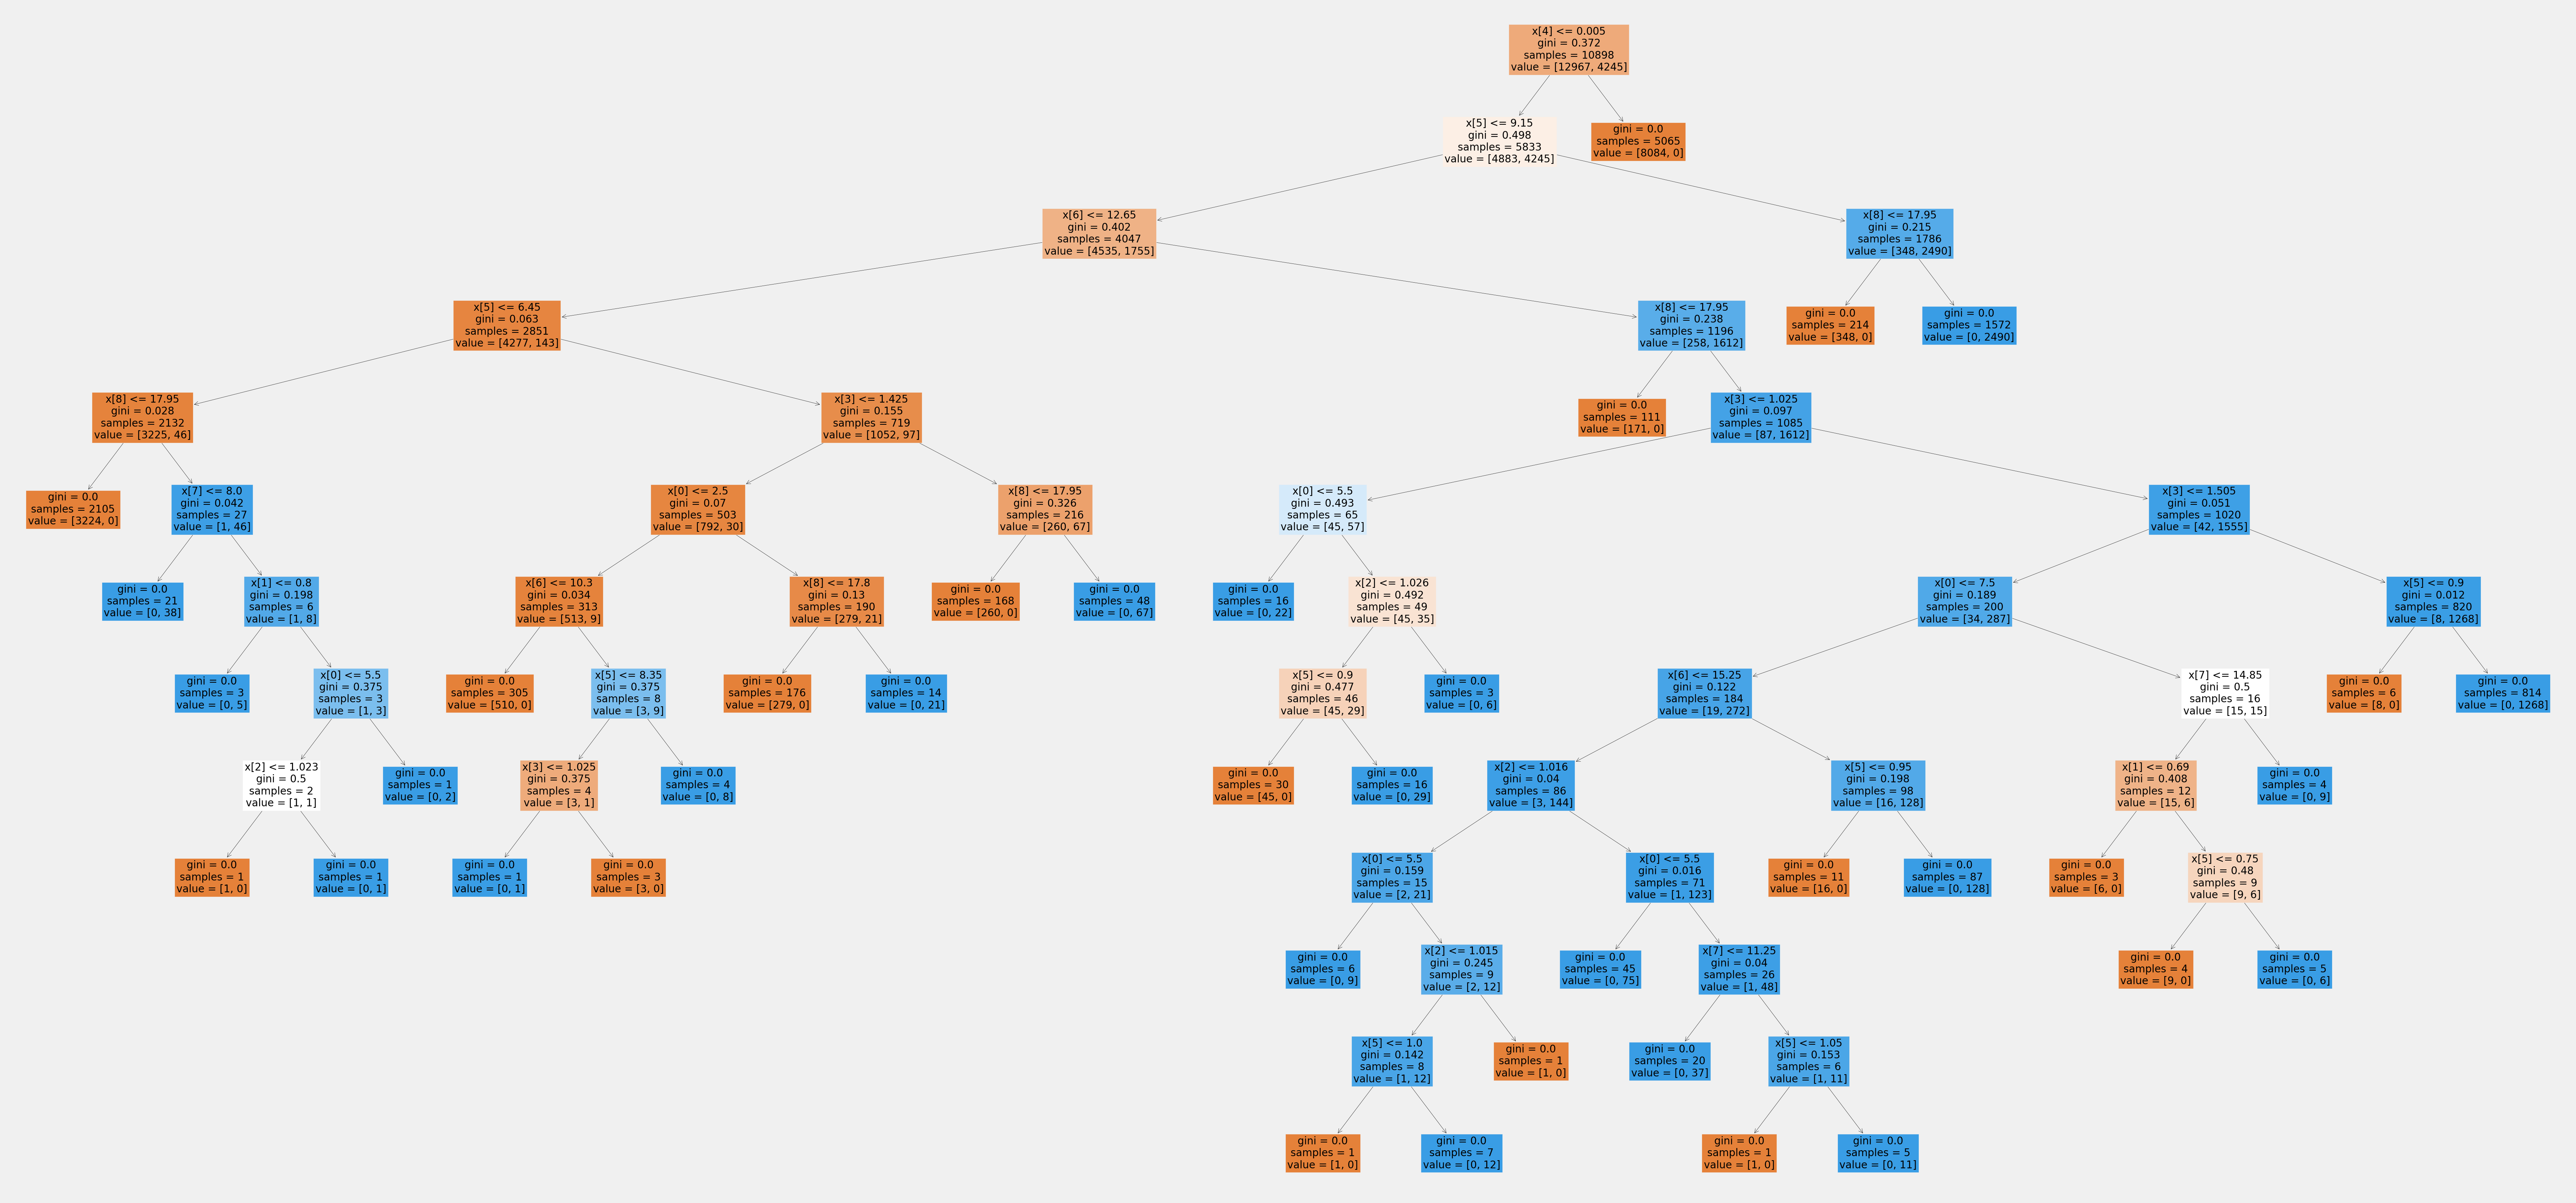

In [40]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [41]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02897566, 0.00581821, 0.00785495, 0.10171765, 0.3542481 ,
       0.13017858, 0.0905448 , 0.01981072, 0.26085133])

In [42]:
# Create a list of weather features

wx_list = [feature.replace('BASEL_', '') for feature in basel_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [46]:
important = pd.Series(newarray, index = wx_list).sort_values()
important

humidity            0.005818
pressure            0.007855
temp_min            0.019811
cloud_cover         0.028976
temp_mean           0.090545
global_radiation    0.101718
sunshine            0.130179
temp_max            0.260851
precipitation       0.354248
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


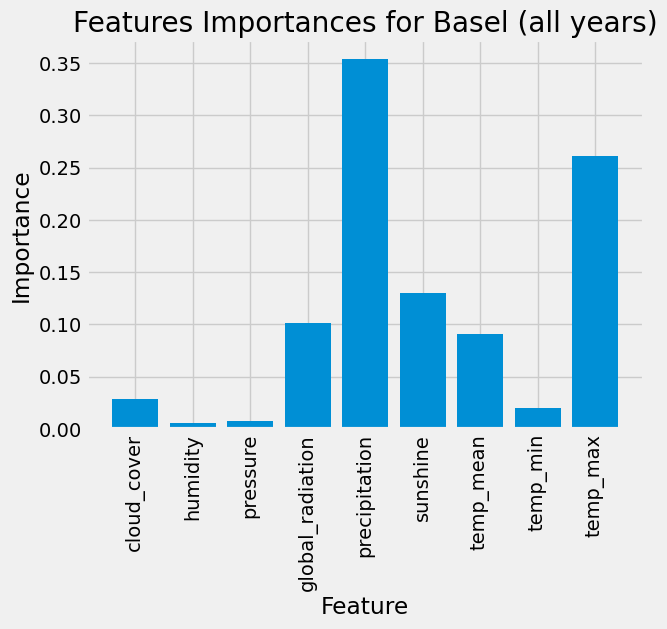

In [49]:
# Plot the results

%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Basel (all years)');
plt.show()

## 8. Random Forest for Sonnblick data (all years)

In [80]:
# Create a list of the columns containing "Sonblick" in their names


sonnblick_list = list(x for x in climate.columns if x.find('SONNBLICK') >=0)

# Create a dataframe with those columns

df_sonnblick = climate[sonnblick_list]
df_sonnblick

SONNBLICK_cloud_cover  SONNBLICK_humidity  SONNBLICK_pressure  \
0                          4                0.73              1.0304   
1                          6                0.97              1.0292   
2                          8                0.93              1.0320   
3                          5                0.93              1.0443   
4                          2                0.75              1.0430   
...                      ...                 ...                 ...   
22945                      2                0.84              1.0263   
22946                      5                0.84              1.0263   
22947                      3                0.84              1.0263   
22948                      3                0.84              1.0263   
22949                      4                0.84              1.0263   

       SONNBLICK_global_radiation  SONNBLICK_precipitation  \
0                            0.48                     0.01   
1                            0.21                     0.61   
2                            0.21                     3.20   
3                            0.22                     1.10   
4                            0.72                     0.01   
...                           ...                      ...   
22945                        1.56                     0.47   
22946                        1.56                     0.47   
22947                        1.56                     0.47   
22948                        1.56                     0.47   
22949                        1.56                     0.47   

       SONNBLICK_sunshine  SONNBLICK_temp_mean  SONNBLICK_temp_min  \
0                     2.3                 -5.9                -8.5   
1                     0.0                 -9.5               -10.5   
2                     0.0                 -9.5               -10.0   
3                     0.0                -11.5               -12.9   
4                     6.1                 -9.3               -12.0   
...                   ...                  ...                 ...   
22945                 4.7                  0.6                -1.4   
22946                 4.7                  2.3                 0.6   
22947                 4.7                  3.3                 2.1   
22948                 4.7                  3.4                 2.7   
22949                 4.7                  1.7                 0.7   

       SONNBLICK_temp_max  
0                    -3.2  
1                    -8.5  
2                    -8.9  
3                   -10.0  
4                    -6.5  
...                   ...  
22945                 2.6  
22946                 4.0  
22947                 4.5  
22948                 4.1  
22949                 2.7  

[22950 rows x 9 columns]

In [81]:
# Reduce answers dataset to sonnblick's answers only

answers_sonnblick = answers['SONNBLICK_pleasant_weather']
answers_sonnblick

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: SONNBLICK_pleasant_weather, Length: 22950, dtype: int64

In [82]:
# Reshaping for modeling

X = df_sonnblick
y = answers_sonnblick

# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [83]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


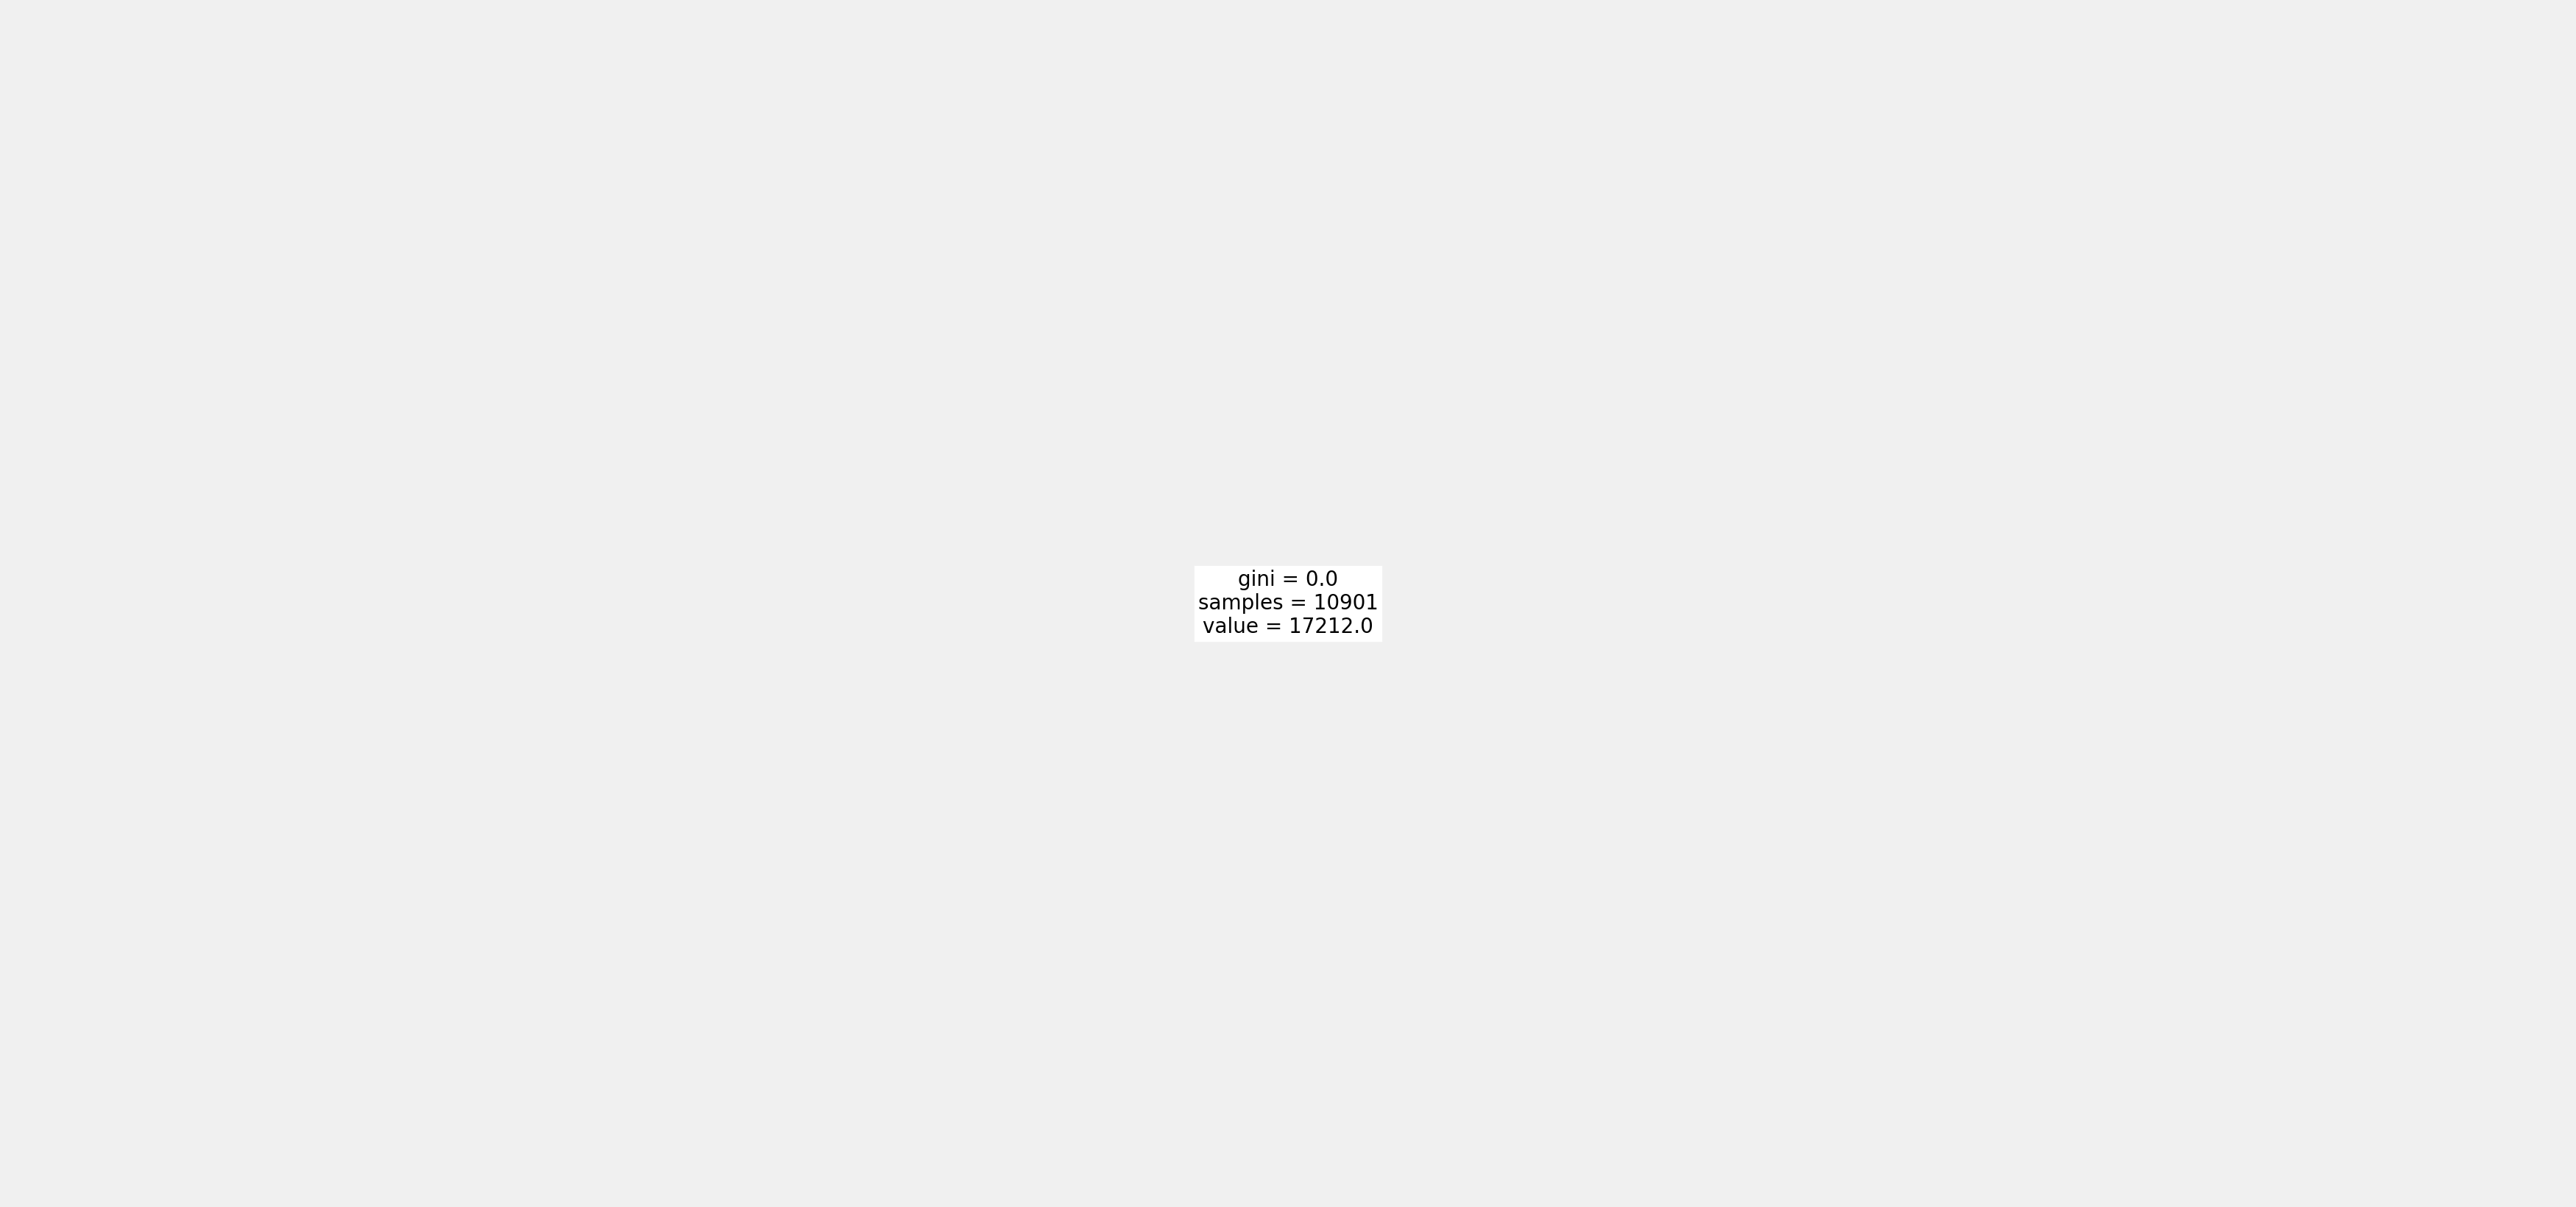

In [85]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [86]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
# Create a list of weather features

wx_list = [feature.replace('SONNBLICK_', '') for feature in sonnblick_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [88]:
important = pd.Series(newarray, index = wx_list).sort_values()
important

cloud_cover         0.0
humidity            0.0
pressure            0.0
global_radiation    0.0
precipitation       0.0
sunshine            0.0
temp_mean           0.0
temp_min            0.0
temp_max            0.0
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


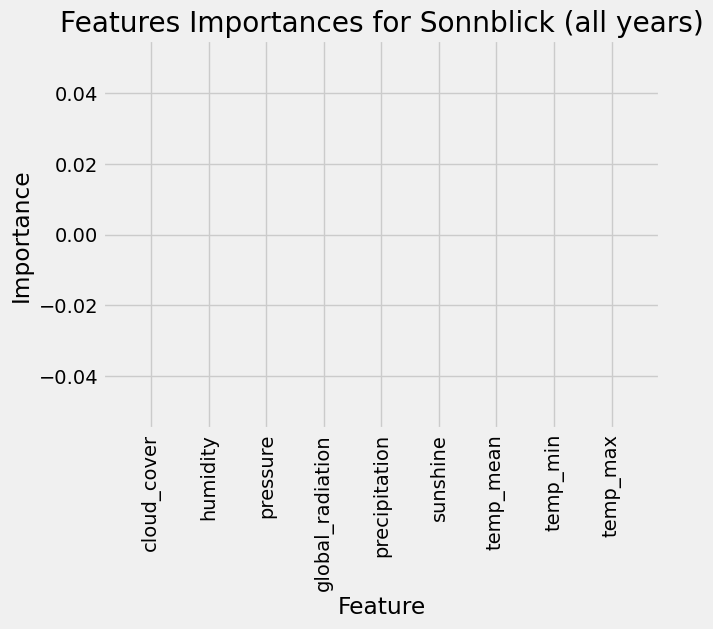

In [89]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Sonnblick (all years)');
plt.show()

## 9. Random Forest for BELGRADE data (all years)

In [90]:
# Create a list of the columns containing "BELGRADE" in their names


BELGRADE_list = list(x for x in climate.columns if x.find('BELGRADE') >=0)

# Create a dataframe with those columns

df_BELGRADE = climate[BELGRADE_list]
df_BELGRADE

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                         1               0.81             1.0195   
1                         6               0.84             1.0172   
2                         6               0.77             1.0179   
3                         8               0.93             1.0268   
4                         8               0.99             1.0286   
...                     ...                ...                ...   
22945                     2               0.68             1.0278   
22946                     0               0.68             1.0295   
22947                     2               0.68             1.0278   
22948                     1               0.68             1.0238   
22949                     4               0.68             1.0235   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                           0.88                    0.00                7.0   
1                           0.25                    0.00                0.0   
2                           0.67                    0.00                3.5   
3                           0.25                    0.00                0.0   
4                           0.25                    0.06                0.0   
...                          ...                     ...                ...   
22945                       1.57                    0.18                5.7   
22946                       1.57                    0.18                5.7   
22947                       1.57                    0.18                5.7   
22948                       1.57                    0.18                5.7   
22949                       1.57                    0.18                5.7   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
0                     3.7               -0.9                7.9  
1                     2.9                2.2                4.4  
2                     3.1               -0.5                6.4  
3                     2.0               -2.0                3.0  
4                     2.0                0.7                2.8  
...                   ...                ...                ...  
22945                18.2               12.1               24.4  
22946                15.9               10.6               21.2  
22947                13.4                8.6               18.2  
22948                15.0                9.1               20.9  
22949                14.4               10.4               18.4  

[22950 rows x 9 columns]

In [102]:
# Reduce answers dataset to BELGRADE's answers only

answers_BELGRADE = answers['BELGRADE_pleasant_weather']
answers_BELGRADE

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [92]:
df_BELGRADE.shape # observations dataset has t

(22950, 9)

In [93]:
# Reshaping for modeling

X = df_BELGRADE
y = answers_BELGRADE

# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [94]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


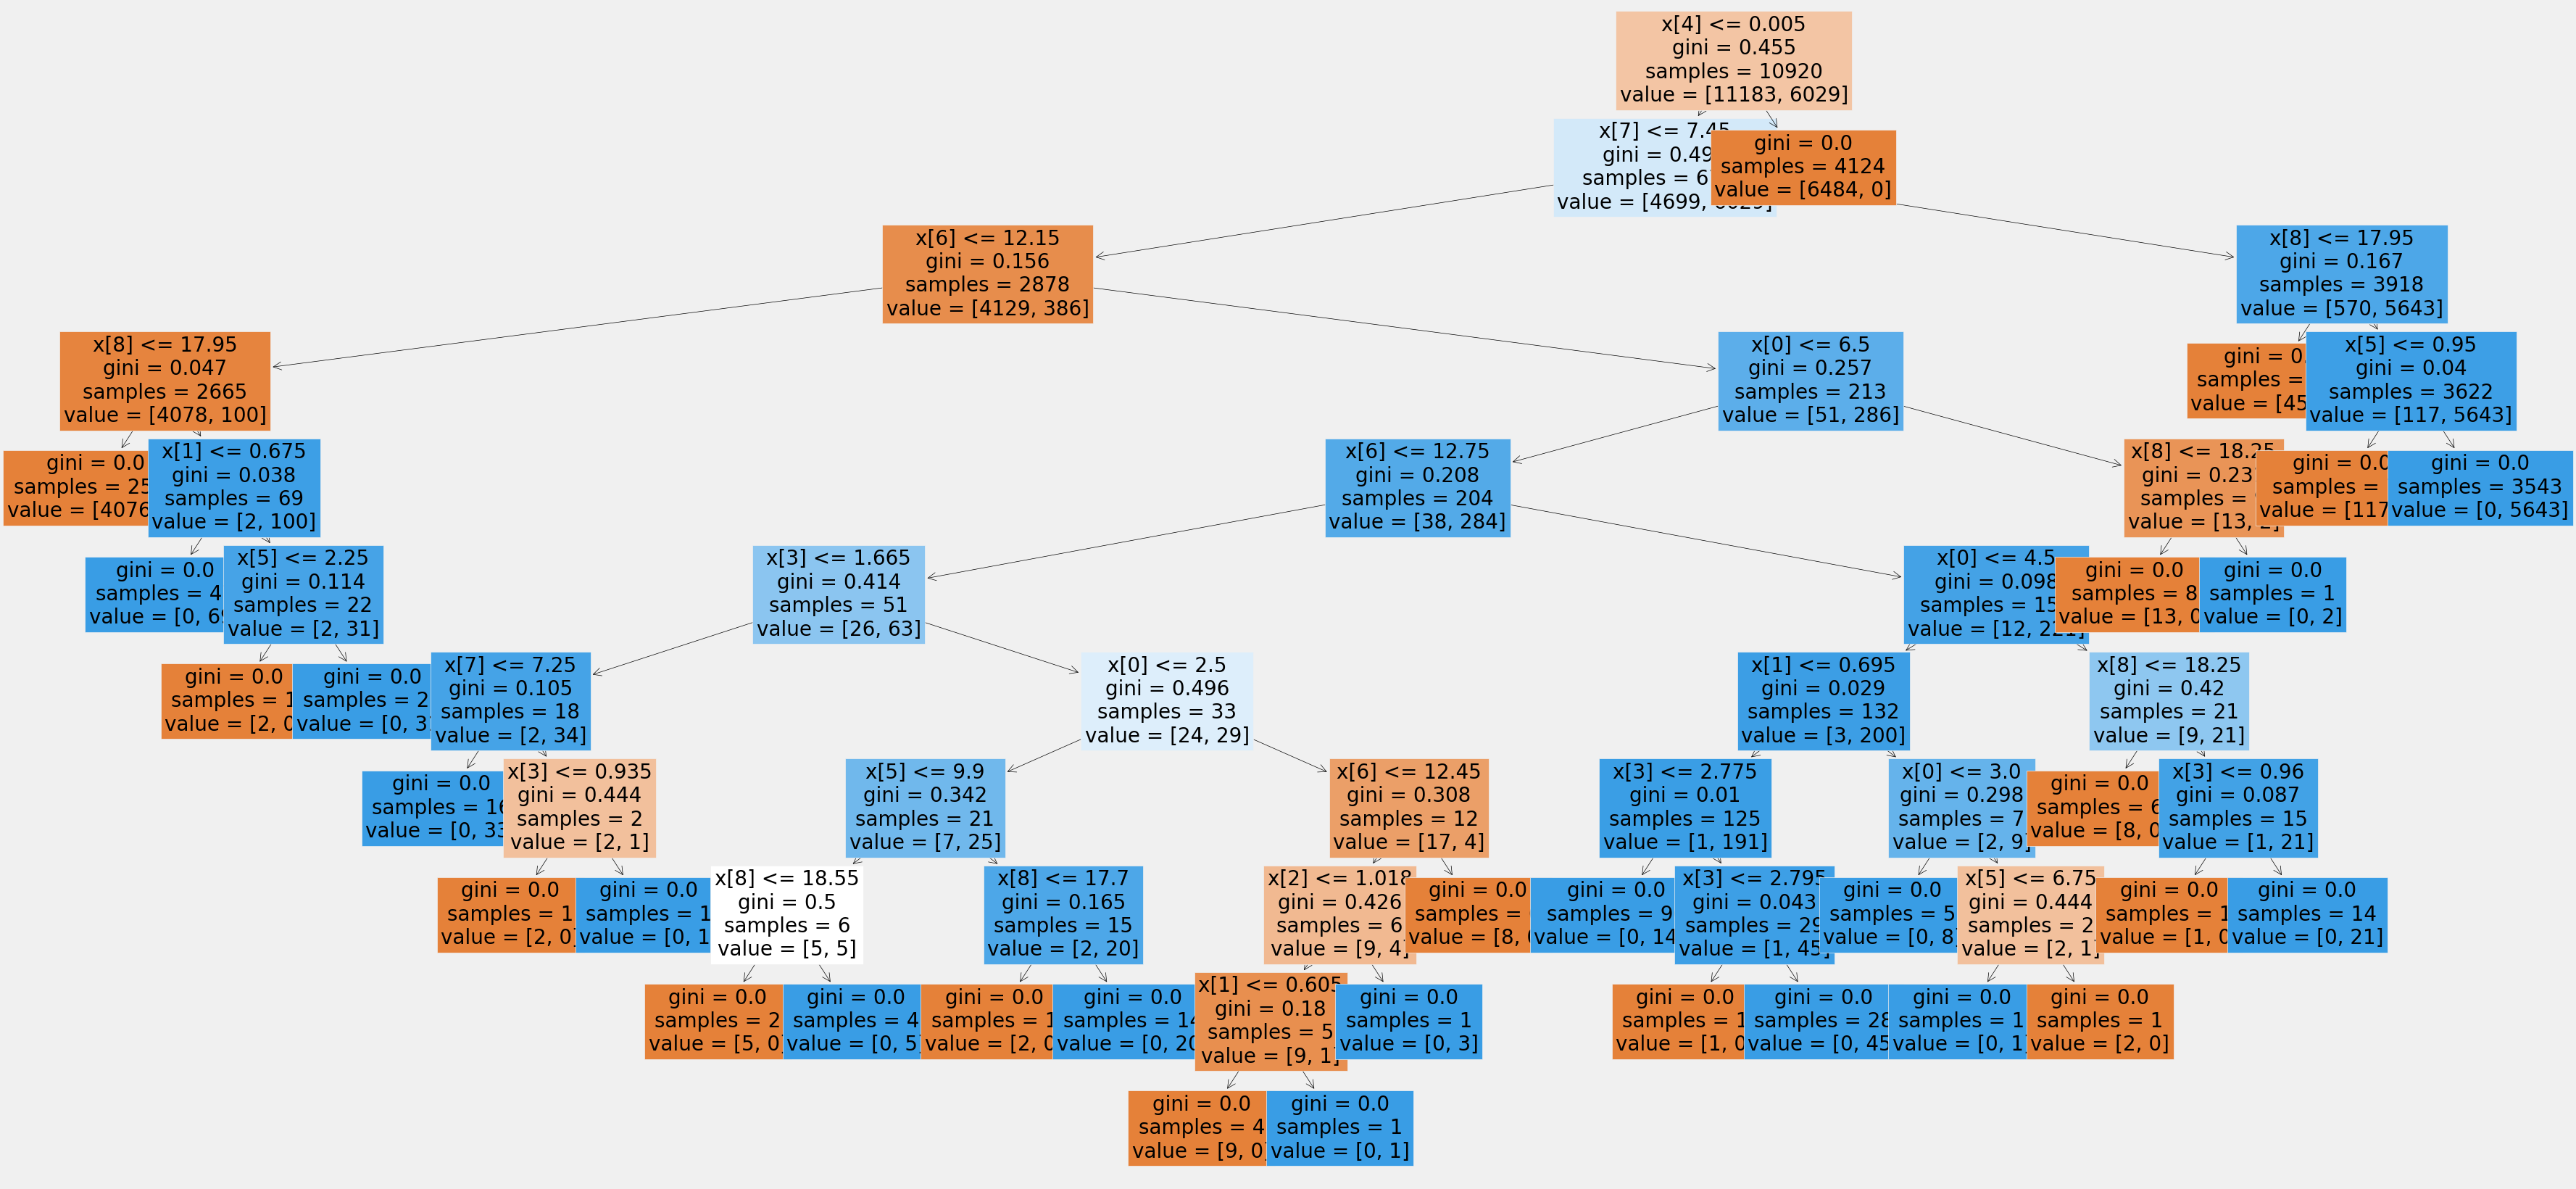

In [96]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [97]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04142513, 0.00964783, 0.0066697 , 0.04147738, 0.35509628,
       0.07821542, 0.19003564, 0.04645027, 0.23098236])

In [98]:
# Create a list of weather features

wx_list = [feature.replace('BELGRADE_', '') for feature in BELGRADE_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [99]:
important = pd.Series(newarray, index = wx_list).sort_values()
important

pressure            0.006670
humidity            0.009648
cloud_cover         0.041425
global_radiation    0.041477
temp_min            0.046450
sunshine            0.078215
temp_mean           0.190036
temp_max            0.230982
precipitation       0.355096
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


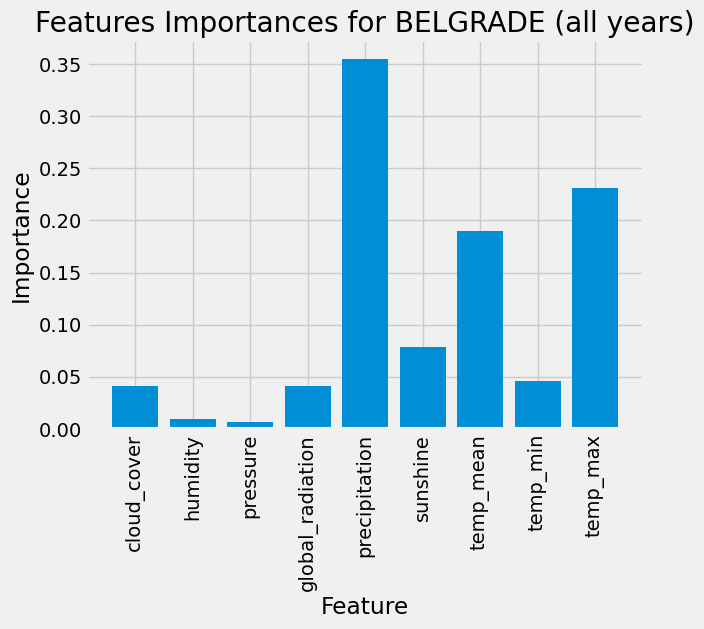

In [100]:
# Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for BELGRADE (all years)');
plt.show()

## 9. Random Forest for STOCKHOLM data (all years)

In [101]:
# Create a list of the columns containing "STOCKHOLM" in their names


STOCKHOLM_list = list(x for x in climate.columns if x.find('STOCKHOLM') >=0)

# Create a dataframe with those columns

df_STOCKHOLM = climate[STOCKHOLM_list]
df_STOCKHOLM

STOCKHOLM_cloud_cover  STOCKHOLM_pressure  STOCKHOLM_global_radiation  \
0                          5              1.0114                        0.05   
1                          5              1.0114                        0.05   
2                          5              1.0114                        0.05   
3                          5              1.0114                        0.05   
4                          5              1.0114                        0.05   
...                      ...                 ...                         ...   
22945                      5              1.0161                        1.11   
22946                      5              1.0122                        1.11   
22947                      5              1.0059                        1.11   
22948                      5              1.0160                        1.11   
22949                      5              1.0164                        1.11   

       STOCKHOLM_precipitation  STOCKHOLM_sunshine  STOCKHOLM_temp_mean  \
0                         0.32                 0.0                  4.2   
1                         0.06                 0.0                  4.0   
2                         0.02                 0.0                  2.4   
3                         0.00                 0.0                  1.2   
4                         1.32                 0.0                  3.3   
...                        ...                 ...                  ...   
22945                     0.14                 3.2                 11.5   
22946                     0.14                 0.8                 12.5   
22947                     0.14                 6.9                 13.1   
22948                     0.14                 8.4                  7.5   
22949                     0.14                 0.4                  9.7   

       STOCKHOLM_temp_min  STOCKHOLM_temp_max  STOCKHOLM_humidity  
0                     2.2                 4.9                0.98  
1                     3.0                 5.0                0.62  
2                     1.3                 4.1                0.69  
3                     0.4                 2.3                0.98  
4                     0.8                 4.3                0.96  
...                   ...                 ...                 ...  
22945                 8.2                14.2                0.98  
22946                11.0                14.3                1.00  
22947                12.1                14.4                0.85  
22948                 5.1                12.4                0.94  
22949                 5.0                12.6                0.97  

[22950 rows x 9 columns]

In [103]:
# Reduce answers dataset to STOCKHOLM's answers only

answers_STOCKHOLM = answers['STOCKHOLM_pleasant_weather']
answers_STOCKHOLM

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: STOCKHOLM_pleasant_weather, Length: 22950, dtype: int64

In [104]:
# Reshaping for modeling

X = df_STOCKHOLM
y = answers_STOCKHOLM

# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [105]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


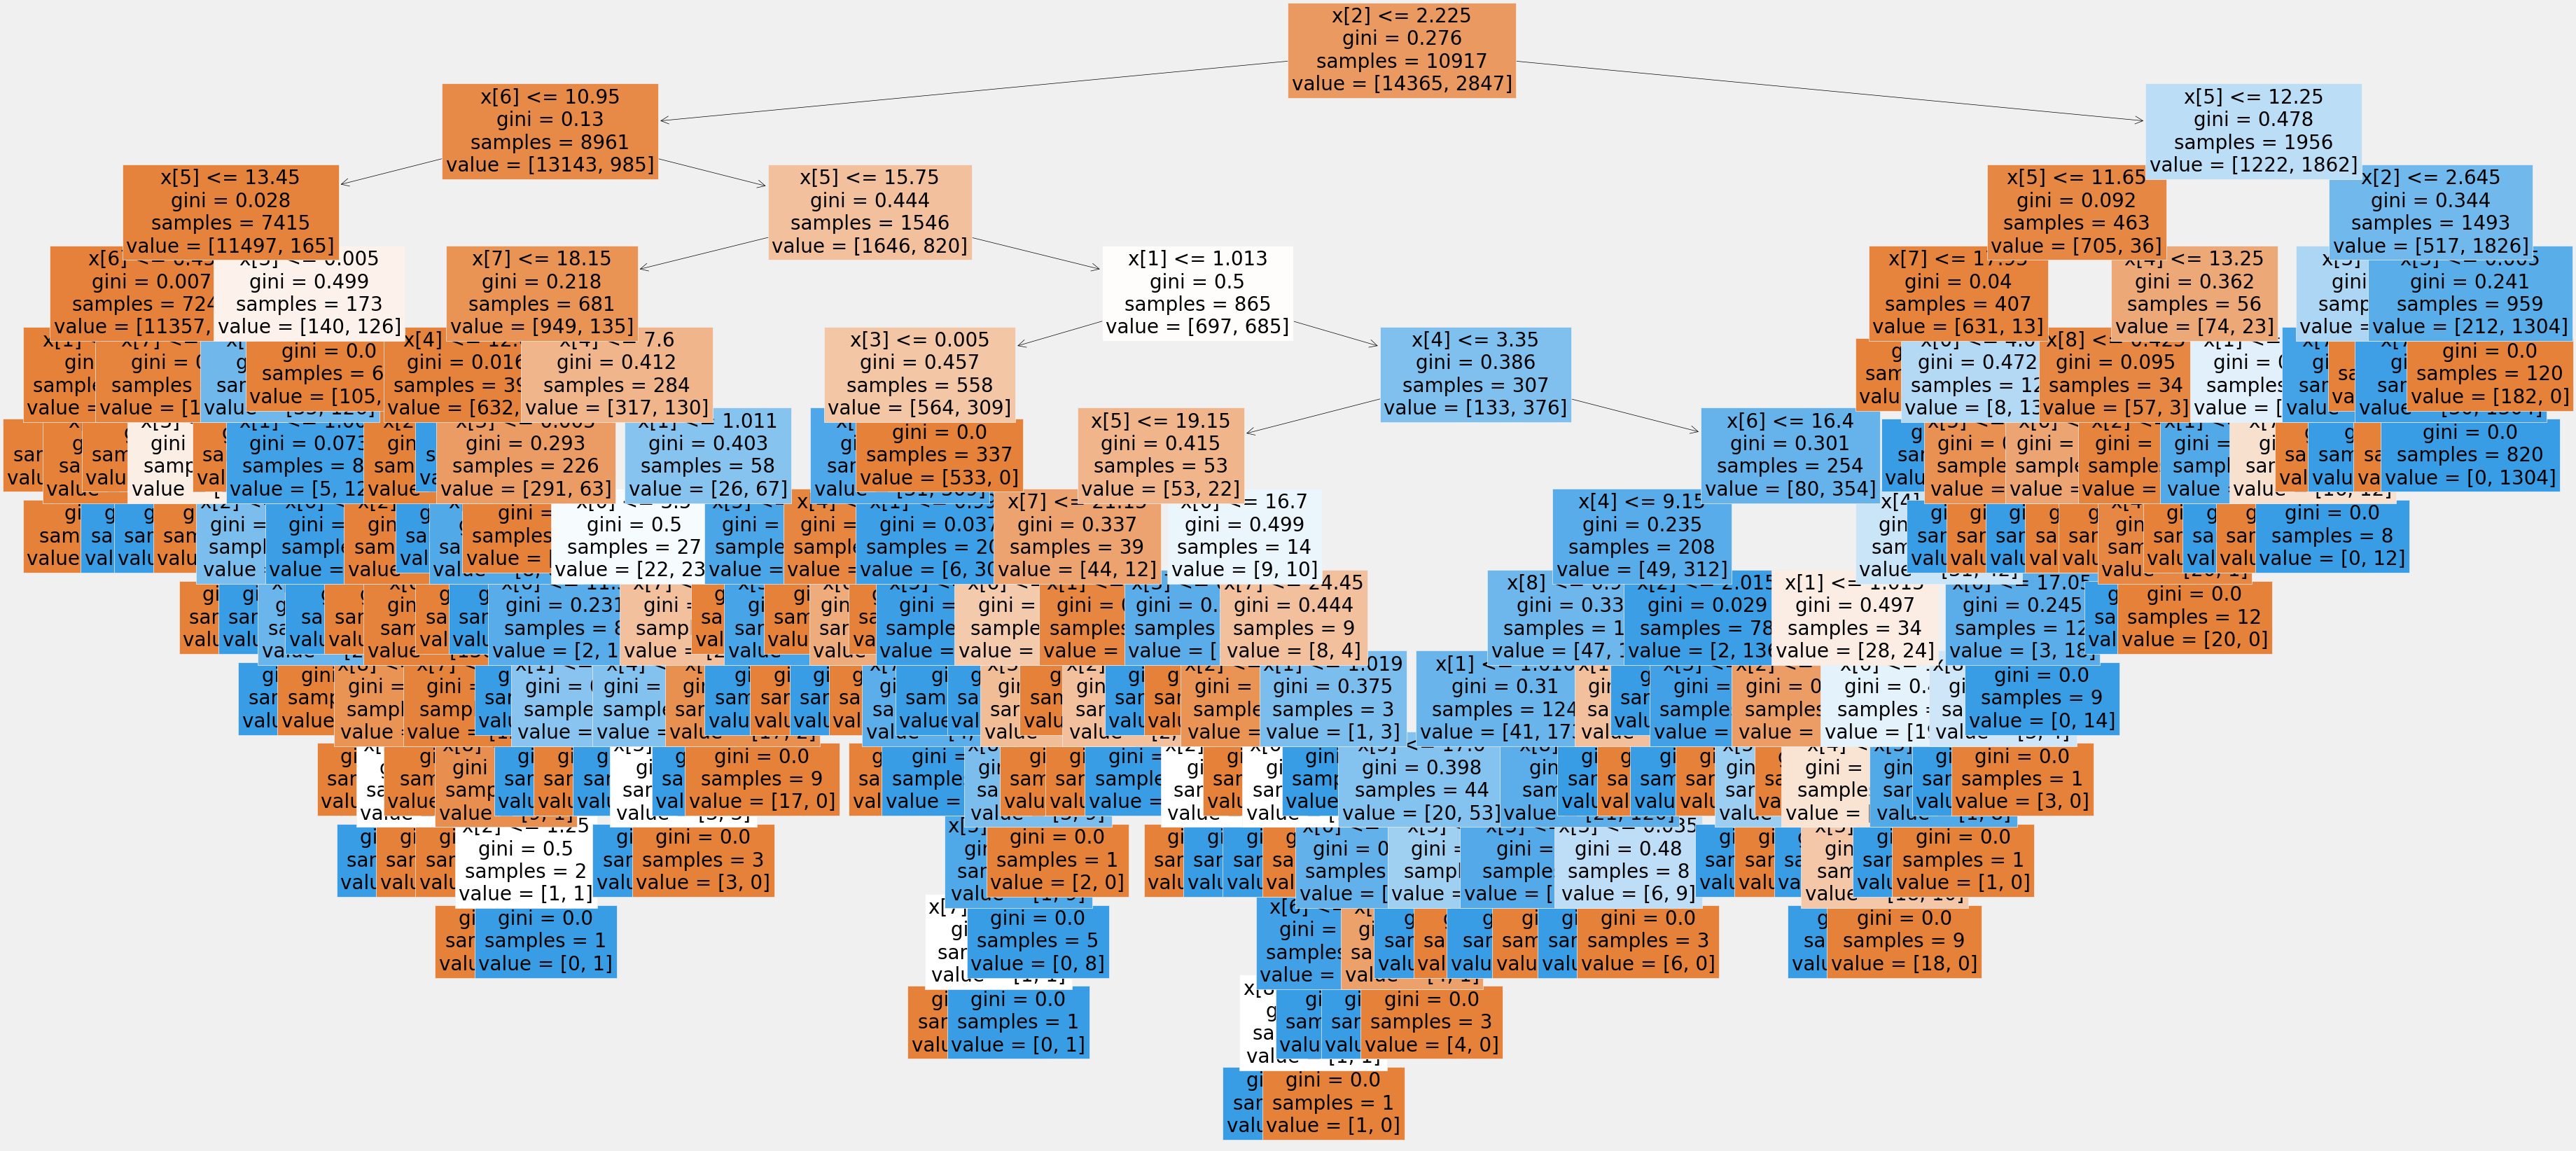

In [107]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [108]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01546207, 0.01173381, 0.06758492, 0.31741298, 0.07310004,
       0.1150903 , 0.05529921, 0.34242193, 0.00189474])

In [109]:
# Create a list of weather features

wx_list = [feature.replace('STOCKHOLM_', '') for feature in STOCKHOLM_list]
wx_list

['cloud_cover',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max',
 'humidity']

In [110]:
important = pd.Series(newarray, index = wx_list).sort_values()
important

humidity            0.001895
pressure            0.011734
cloud_cover         0.015462
temp_min            0.055299
global_radiation    0.067585
sunshine            0.073100
temp_mean           0.115090
precipitation       0.317413
temp_max            0.342422
dtype: float64

['cloud_cover', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max', 'humidity']


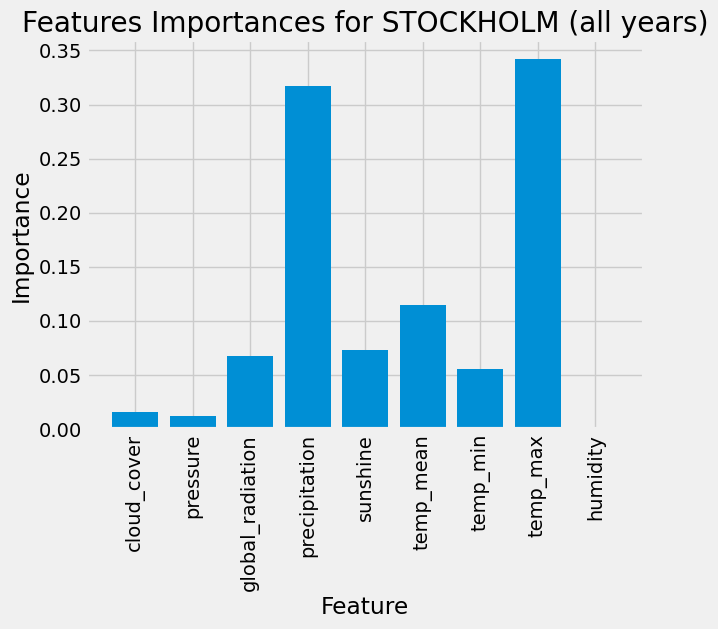

In [111]:
# Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for STOCKHOLM (all years)');
plt.show()